# In this section, we compute scatter-plots of numerical features of housing data of Singapore

## a scatter plot consists of a grid of figures:
- diagonal plots correspond to histogram of each numerical feature
- off-diagonal figures display each numerical feature vs the rest 

In [1]:
import seaborn as sns

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import os, sys


# Load data

In [2]:
path_to_data_mine = '../../data_mine/'
#file_name = 'resale-flat-prices-based-on-approval-date-1990-1999.csv'
#file_name = 'resale-flat-prices-based-on-approval-date-2000-feb-2012.csv'
#file_name  = 'resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
file_name = 'resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv'



path_to_file = path_to_data_mine + file_name

df = pd.read_csv(path_to_file, encoding='utf-8')


df . head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


# A function to compute Pearson correlation coefficient:
$\rho = \frac{\left< x y \right>  - \left< y \right>\left< y \right>}{\sqrt{\left( \left< x^2 \right> - \left< x \right>^2 \right) \left( \left< y^2 \right> - \left< y \right>^2 \right) }}$ 


In [21]:

###########################
#                         #
#                         #
#       Correlation       #
#                         #
#                         #
###########################


# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
	
	# Calculate the value
	coef = np.corrcoef(x, y)[0][1]
	
	# Make the label
	
	label = r'$\rho$ = ' + str(round(coef, 2))
    
   # Add the label to the plot
   
	ax = plt.gca()
	ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)


# Price distribution is right-skewed. Transform the price to lagarithmic scale

In [22]:
df['log_resale_price'] = np . log10( df['resale_price'])

df = df . drop ( 'resale_price', 1 ) # 1 : column



# Compute scatter-plots for mumerical variables

/home/rahbari/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


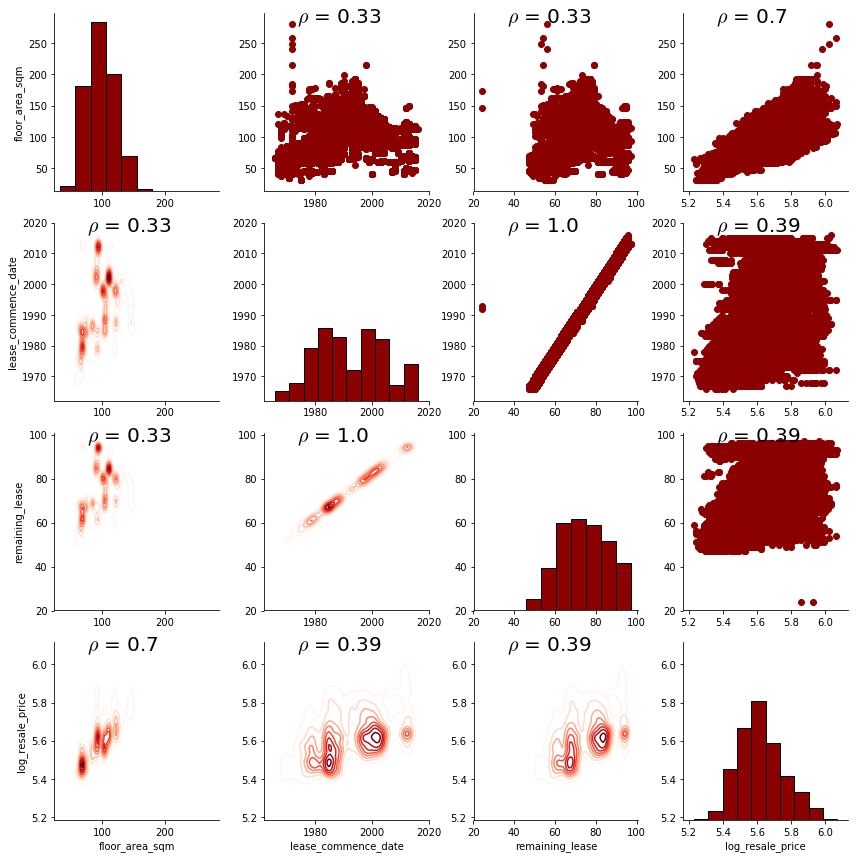

In [23]:
grid = sns.PairGrid(df, size = 3)


grid.map_upper(plt.scatter, color = 'darkred')


grid.map_upper(corr)


grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k')

grid.map_lower( sns.kdeplot, cmap = 'Reds' )

x = grid.map_lower(corr)


plt . show()


## We see that:

- 1. there is no any right- or left-skewed distribution.

- 2. floor area is correlated with the resale  price, as one expects. The large correlation coefficient, $\rho=0.7$, demonstrated this.

- 3. one can see that there is a non-negligible correlation between lease commence date and remaining lease and the resale price. 

